## Algorithmus von Floyd and Warshall

#### Kürzeste Wege


```
FLOYD-WARSHALL( W ):
    n = W.rows
    D(0) = W
    for k = 1 to n
        let D(k) = = [ d[i][j](k) ] be a new n x n matrix
        for i = 1 to n
            for j = 1 to n
                d[i][j](k) = min(d[i][j](k-1), d[i][k](k) + d[k][j](k-1))

    return D(n)
```


[Simulation](https://www.cs.usfca.edu/~galles/visualization/Floyd.html)

[Beispiele](https://compprog.wordpress.com/2007/11/15/all-sources-shortest-path-the-floyd-warshall-algorithm/)

[Beispiel2](http://cis.k.hosei.ac.jp/~rhuang/Miccl/Algorithm3/lect24-floyd-warshall.pdf)

[Beispiel3](http://professorjava.weebly.com/shortest-path-floyd-warshall.html)

In [39]:
#Example 1 5x5
B1 = [
    [0,10,0,5,0]
    [10,0,5,5,10]
    [0,5,0,0,0]
    [5,5,0,0,20]
    [0,10,0,20,0]
]

BT_2 = [
    [0,8,0,1]
    [0,0,1,0]
    [4,0,0,0]
    [0,2,9,0]
]

#Example2 4 x 4
B2 = [
    [0,0,4,0]
    [8,0,0,2]
    [0,1,0,9]
    [1,0,0,0]
]
#Example 3 7x7
B = [
    [0,3,0,0,7,0,0]
    [3,0,2,0,4,3,0]
    [0,2,0,2,0,0,0]
    [0,0,2,0,0,0,2]
    [7,4,0,0,0,1,0]
    [0,3,0,0,1,0,2]
    [0,0,0,2,0,2,0]
]



Bx = [
    [0,10,0,0,0]
    [10,0,5,0,10]
    [0,5,0,0,0]
    [0,0,0,0,20]
    [0,10,0,20,0]
]

A = reshape(B, 7, 7)

7x7 Array{Int64,2}:
 0  3  0  0  7  0  0
 3  0  2  0  4  3  0
 0  2  0  2  0  0  0
 0  0  2  0  0  0  2
 7  4  0  0  0  1  0
 0  3  0  0  1  0  2
 0  0  0  2  0  2  0

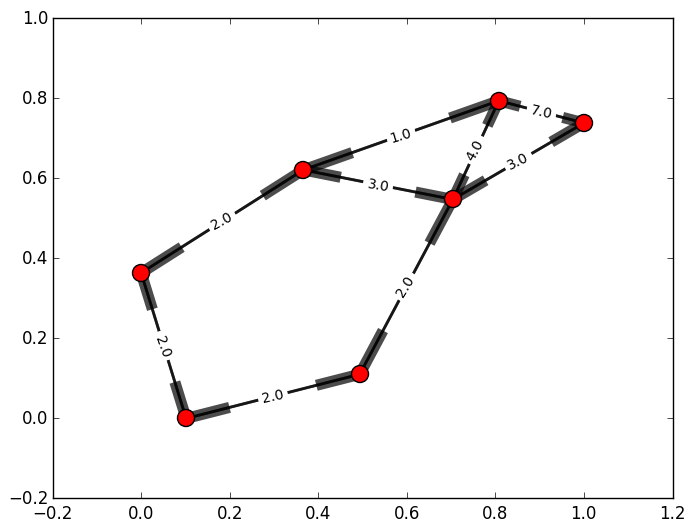

PyObject <matplotlib.collections.LineCollection object at 0x11df5ad90>

In [45]:
using PyPlot;
using PyCall;
@pyimport networkx as nx

N = size(A)[1]
tmp = reshape(A,1,N*N)
c = 1

cols = Array(Int64, 0)
rows = Array(Int64, 0)
weights = Array(Float64,0)

#gr = nx.Graph()
#gr = nx.DiGraph()
gr = nx.MultiDiGraph()

for y in 1:N
    for x in 1:N
        if tmp[c]>0
            push!(cols,y)
            push!(rows,x)
            push!(weights,tmp[c])
        end
        c =c+1
    end
end

edges = Array((Int64,Int64,Float64), 0)


for edge in zip(rows,cols,weights)
    push!(edges,edge)
end

pycall(gr["add_weighted_edges_from"],Any,edges)
pos=nx.spring_layout(gr)
edge_labels=Dict([((u,v,),d["weight"]) for (u,v,d) in pycall(gr["edges"],Array,(data=true))])
nx.draw_networkx_edge_labels(gr,pos,edge_labels=edge_labels)
nl = pycall(gr["nodes"],Array,())
nx.draw_networkx_nodes(gr,pos,nodelist=nl,  node_size=150)
el = [(u,v) for (u,v,d) in pycall(gr["edges"],Array,(data=true))]
nx.draw_networkx_edges(gr,pos,edgelist=el,width=2,alpha=0.7)

Array[
Any[0 3 1000 1000 7 1000 1000
    3 0 2 1000 4 3 1000
    1000 2 0 2 1000 1000 1000
    1000 1000 2 0 1000 1000 2
    7 4 1000 1000 0 1 1000
    1000 3 1000 1000 1 0 2
    1000 1000 1000 2 1000 2 0],

Any[0 3 1000 1000 7 1000 1000
    3 0 2 1000 4 3 1000
    1000 2 0 2 1000 1000 1000
    1000 1000 2 0 1000 1000 2
    7 4 1000 1000 0 1 1000
    1000 3 1000 1000 1 0 2
    1000 1000 1000 2 1000 2 0],

Any[0 3 5 1000 7 6 1000
    3 0 2 1000 4 3 1000
    5 2 0 2 6 5 1000
    1000 1000 2 0 1000 1000 2
    7 4 6 1000 0 1 1000
    6 3 5 1000 1 0 2
    1000 1000 1000 2 1000 2 0],

Any[0 3 5 7 7 6 1000
    3 0 2 4 4 3 1000
    5 2 0 2 6 5 1000
    7 4 2 0 8 7 2
    7 4 6 8 0 1 1000
    6 3 5 7 1 0 2
    1000 1000 1000 2 1000 2 0],

Any[0 3 5 7 7 6 9
    3 0 2 4 4 3 6
    5 2 0 2 6 5 4
    7 4 2 0 8 7 2
    7 4 6 8 0 1 10
    6 3 5 7 1 0 2
    9 6 4 2 10 2 0],

Any[0 3 5 7 7 6 9
    3 0 2 4 4 3 6
    5 2 0 2 6 5 4
    7 4 2 0 8 7 2
    7 4 6 8 0 1 10
    6 3 5 7 1 0 2
    9 6 4 2 10 2 0],


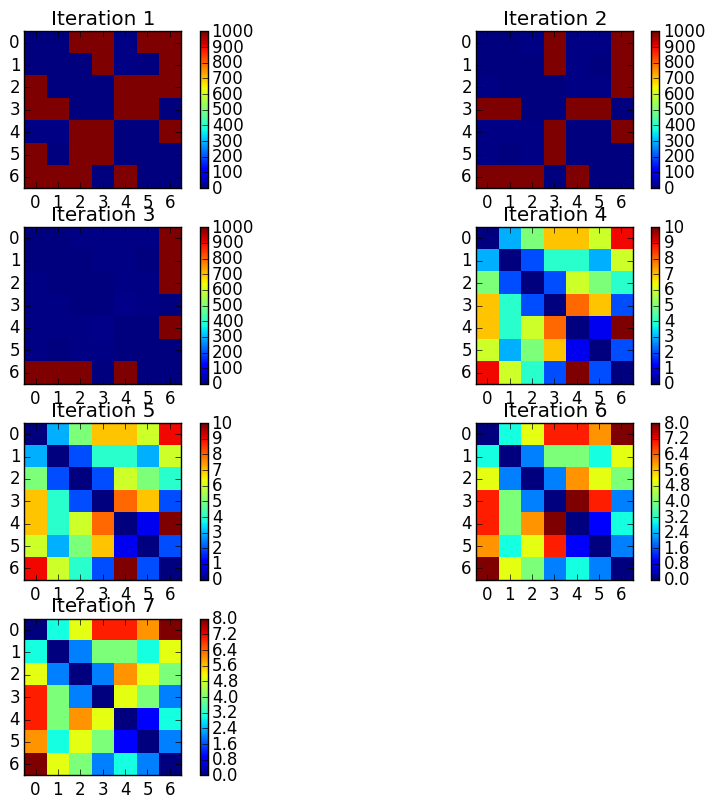

In [42]:
D=0
l=ndims(A)
N = size(A)[1]
C = [A[i,j] for i=1:N,j=1:N]

for i = 1:N # Zeile
    for j = 1:N # Spalte  
        if C[i,j] == 0 && i != j
            C[i,j]=10^3
        end
    end
end

D = Array(Array, 0)
push!(D,C)


for k = 1:N # Iteration 
    tmp = [D[k][i,j] for i=1:N,j=1:N]
    
    push!(D,tmp) # 1..N+1
    for i = 1:N # Zeile
        for j = 1:N # Spalte   
            if D[k+1][i,j] > D[k][i,k] + D[k][k,j]
                D[k+1][i,j] = D[k][i,k] + D[k][k,j]               
            end
        end
    end
end

#print(D[N+1])

figure(figsize=(3*3, 4*2))
subplots_adjust(bottom=.05, left=.04, right=.96, top=.98, hspace=.25)

for i = 1:N
    subplot(4, 2, i)
    title("Iteration $(i)")
    imgplot = imshow(D[i+1])
    plt.colorbar()
    pycall(imgplot["set_interpolation"],Any,"nearest")
end

print(D)

### Musterlösung


 { 0, 3, 5, 7, 7, 6, 8 }<bR>
 { 3, 0, 2, 4, 4, 3, 5 }<bR>
 { 5, 2, 0, 2, 6, 5, 4 }<bR>
 { 7, 4, 2, 0, 5, 4, 2 }<bR>
 { 7, 4, 6, 5, 0, 1, 3 }<bR>
 { 6, 3, 5, 4, 1, 0, 2 }<bR>
 { 8, 5, 4, 2, 3, 2, 0 }<bR>

In [46]:
D[8]

7x7 Array{Any,2}:
 0  3  5  7  7  6  8
 3  0  2  4  4  3  5
 5  2  0  2  6  5  4
 7  4  2  0  5  4  2
 7  4  6  5  0  1  3
 6  3  5  4  1  0  2
 8  5  4  2  3  2  0